## Investigate a Dataset - No Show Appointments

**Dataset Description:**
    
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not 
patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.\
‘Neighborhood’ indicates the location of the hospital.\
‘Scholarship’ indicates whether or not the patient is enrolled in Brazilian welfare program Bolsa Família.\
'Age' indicates age of the patients.\
'Hipertension' tells the patients with hipertension.\
'Diabetes' says who has diabetes or not.\
'Alcoholism' says who is an addict of alcohol or not.\
'Handcap' tells who is an handcap or not.\
'SMS received' tells us about patient that receives an sms or not.\
About the last column(No show)- 'No'if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


**Questions for my analysis:**

1. What is the  age distribution of the patients?
2. What is the  gender distribution (male and female)?
3. patients distribution that went for their appointment.
4. Which of the neighbourhood honoured there appointment and which ones did not?
5. What is the ratio of the people that have benefited from the Bolsa Familia scholarship?
6. which of the diseases is common among the patients?
7. For the most chronic disease, did the patients honoured their appointment?
8. How does sending an SMS influence patient decision to honour an appointment?
9. what hour of the day do patients mostly visit the hospital
10. What day of the week do patients mostly visit the medical facility?
11. What month do patients mostly visit the medical facility?
12. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


**Importing neccessary libraries for the data analysis**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

**Data Wrangling**

Reading the Data:

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv') #looking into the data set 
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Determining the dimension of the dataset:

In [3]:
print('Shape of the dataset (Rows and Columns):')
df.shape

Shape of the dataset (Rows and Columns):


(110527, 14)

Printing data columns of the dataset:

In [4]:
print(list(df.columns.values))

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


#noticed some spelling errors in the column names.\
#the errors will be corrected under the data cleansing section

Descriptive statistics of the data set:

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for duplicated values:

In [7]:
sum(df.duplicated())

0

Check for column with missing values

In [8]:
df.columns[df.isnull().any()].tolist()

[]

**- Data set has no duplicate and missing values**

Data cleaning of the data set:

Task involves;\
Removing unuseful data column for the analysis.\
converting all the column names to lowercase\
Ensuring proper naming of the data column.

In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
#dropping unuseful columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [11]:
#converting columns to lowercase
df = df.rename(columns=str.lower)

In [12]:
#proper naming of the data column
df.rename({'hipertension':'hypertension', 'handcap':'handicap', 'no-show':'show'}, axis=1, inplace = True)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


for easy understanding and analysis, the 'no-show' column is changed to 'show'

In [13]:
#To count the existing number of 'No' and 'Yes'
df['show'].value_counts()

No     88208
Yes    22319
Name: show, dtype: int64

In [14]:
#since the column 'no-show' has been changed to 'show', the data entries should be interchanged too
df['show'] = df['show'].replace(['No','Yes'], ['Yes','No'])


In [15]:
df['show'].value_counts()

Yes    88208
No     22319
Name: show, dtype: int64

-Since the values are identical, then the replacement worked well.

Converting the scheduleday and appointmentday to datetime:

In [16]:
#scheduleday to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [17]:
#appointmentday to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [18]:
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,Yes
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,Yes
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,Yes
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,Yes


In order to answer some of the outlined data analysis questions, additional columns are needed. These include;

appointment hour, weekday, month and year

In [19]:
#Appointment hour
df['appointment_hour'] = df['scheduledday'].dt.hour

In [20]:
#Appointment day
df['appointment_day'] = df['scheduledday'].dt.day_name()

In [21]:
#Appointment month
df['appointment_month'] = df['scheduledday'].dt.month_name()

In [22]:
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,appointment_hour,appointment_day,appointment_month
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18,Friday,April
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16,Friday,April
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16,Friday,April
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17,Friday,April
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16,Friday,April


**Exploratory Data Analysis**

In [23]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,appointment_hour,appointment_day,appointment_month
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18,Friday,April
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16,Friday,April
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16,Friday,April
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17,Friday,April
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16,Friday,April


**Research Question 1 (What is the age distribution of the patients?)**

In [24]:
#plotting an histogram distribution for the age
def histgram(col_name):
    plt.figure(figsize = (10, 8))
    sns.histplot(data=df, x=col_name, bins=10, color='steelblue')
    plt.xlabel('Age', size=20)
    plt.ylabel('Count', size=20)
    plt.title('Distribution of Age', size= 20)
    plt.show()

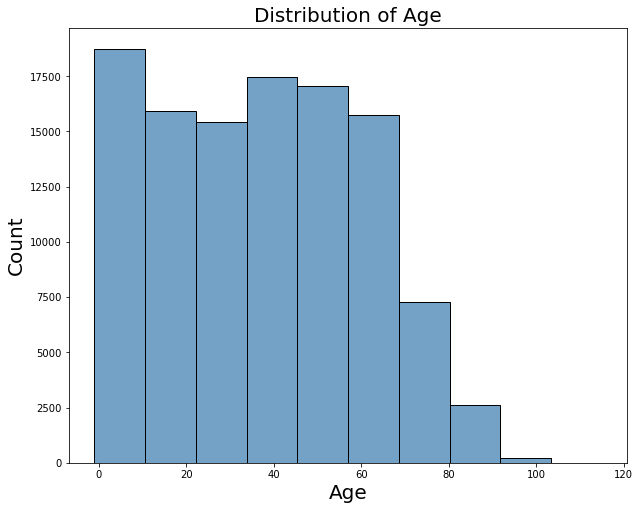

In [25]:
histgram('age')

**Oldest person in the data set is 115. The histogram shows that there is an age below 0. This data has to be removed from the data set.**

In [26]:
#maximum age in the data set
df['age'].max()

115

In [27]:
df['age'].min()

-1

In [28]:
#removing the data with negative age
#locating it index
df[df['age']<0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,appointment_hour,appointment_day,appointment_month
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,Yes,8,Monday,June


In [29]:
#dropping the row with the index
df= df.drop(df.index[99832])
df.shape

(110526, 15)

In [30]:
#replotting the histogram

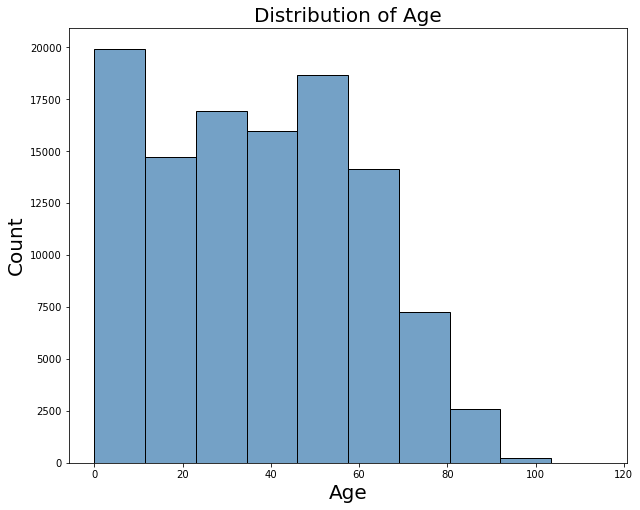

In [31]:
#plotting an histogram distribution for the age
histgram('age')

**The Age distribution is from 0 to 115**

**Research Question 2 (What is the gender distribution (male and female)?)**

In [32]:
def count_v(col_name):
    sns.countplot(data= df, x=col_name);

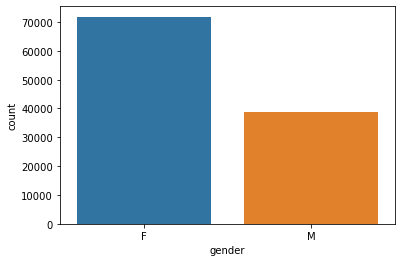

In [33]:
count_v('gender')

In [34]:
#male and female counts in the dataset

df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [35]:
#proportion of the patients that showed for their appointment

show_yes= df.query('show=="Yes"')
show_no= df.query('show=="No"')

In [36]:
#grouping the 'gender' with 'show'
df.groupby('gender')['show'].value_counts(normalize = True)*100

gender  show
F       Yes     79.685129
        No      20.314871
M       Yes     80.032052
        No      19.967948
Name: show, dtype: float64

**-Appoximately 80% of Male and Female showed up for their scheduled appointment**

**Research Question 3 (patients distribution that went for their appointment?)**

In [37]:
#ratio of patients that showed for appointment
show_appt = (show_yes['show'].shape[0] /df['show'].shape[0])*100
show_appt

79.80656135208005

In [38]:
#ratio of people that did not show for appointment
no_show_appt = (show_no['show'].shape[0] /df['show'].shape[0])*100
no_show_appt

20.193438647919944

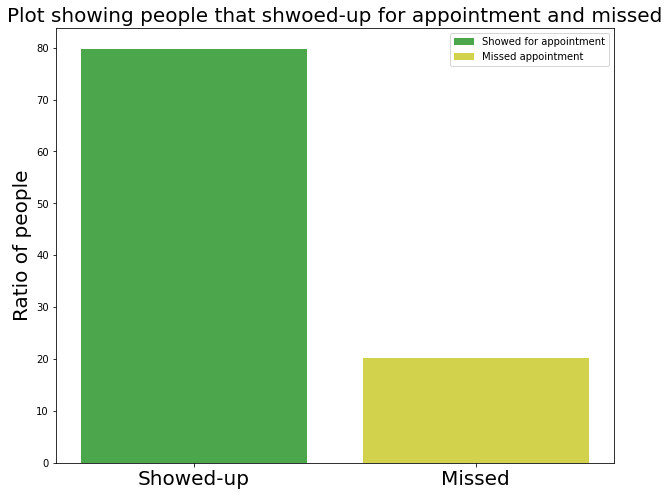

In [39]:
#plotting a bar chart to view the data

plt.figure(figsize = (10,8))
plt.bar(1,show_appt,alpha=0.7,color = 'g',label = 'Showed for appointment')
plt.bar(2 ,no_show_appt, alpha=0.7, color = 'y', label = 'Missed appointment')
location = [1,2]
plt.ylabel('Ratio of people' , fontsize = 20)
label = ['Showed-up', 'Missed']
plt.xticks(location,label, fontsize = 20)
plt.title('Plot showing people that shwoed-up for appointment and missed',fontsize = 20)
plt.legend();

**- From the Bar graph, it can be inferred that about 80% of the people showed-up for their appointment and only about 20% missed their appointments.**

**Research Question 4 (Which of the neighbourhood honoured there appointment and which ones did not?)**

In [40]:
df['neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [41]:
#grouping the 'neighborhood', 'show' and unstacking
df.groupby('neighbourhood')['show'].value_counts().unstack()


#reference: https://www.geeksforgeeks.org/pandas-groupby-unstack/

show,No,Yes
neighbourhood,,
AEROPORTO,1.0,7.0
ANDORINHAS,521.0,1741.0
ANTÔNIO HONÓRIO,50.0,221.0
ARIOVALDO FAVALESSA,62.0,220.0
BARRO VERMELHO,91.0,332.0
...,...,...
SÃO JOSÉ,428.0,1549.0
SÃO PEDRO,515.0,1933.0
TABUAZEIRO,573.0,2559.0


In [42]:
def bar_nb(show_state):
    plt.figure(figsize = (20,8))
    ax=sns.barplot(x=df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack()['%s' %(show_state)].index, 
                   y=df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack()['%s' %(show_state)],data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 12)
    plt.xlabel('Neighbourhood',fontsize = 25)
    plt.ylabel("Show rate for Appointment - %s" %(show_state), fontsize = 20)
    plt.title('Graph of Neighbourhood Hospital and Show for Appointment - %s' %(show_state),fontsize = 25);


#reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

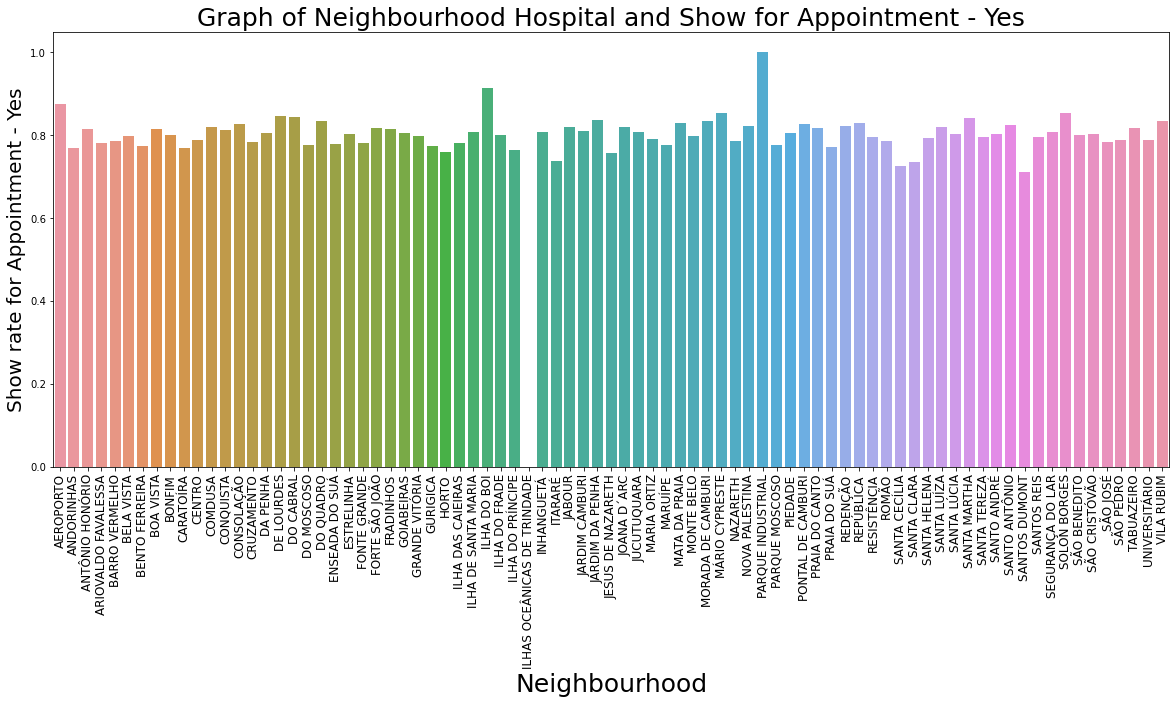

In [43]:
bar_nb('Yes')

**The chart above shows how people visited neighbourhood hospitals for their appointment. The Parque Industrial 
had the highest turnout followed immediately by Ilha Do Boi.** 

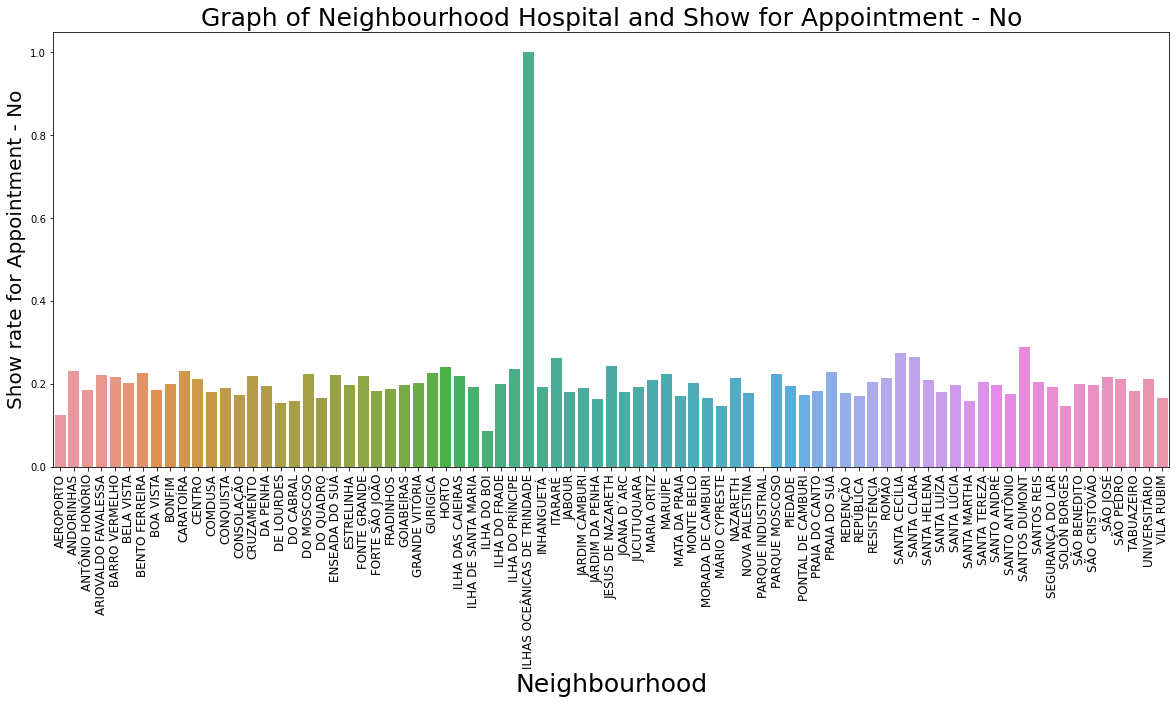

In [44]:
bar_nb('No')

**The chart above shows how people missed appointments according to their neighbourhood. Ilhas Oceanicas De Trindade had the 
highest missed appoinments.**

**Research Question 5 (What is the ratio of the people that have benefited from the Bolsa Familia scholarship?)**

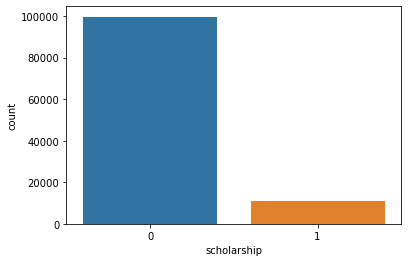

In [45]:
count_v('scholarship')

In [46]:
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [47]:
df.groupby('scholarship')['show'].value_counts(normalize = True)*100

scholarship  show
0            Yes     80.192645
             No      19.807355
1            Yes     76.263696
             No      23.736304
Name: show, dtype: float64

**80% of people that have not received the scholarship honoured their appointments.\
20% of people that have not received the scholarship missed their appointments.\
76% of people that have received the scholarship honoured their appointments.\
24% of people that have not received the scholarship missed their appointments.**

In [48]:
df.groupby('scholarship')['gender'].value_counts(normalize = True)*100

scholarship  gender
0            F         63.197712
             M         36.802288
1            F         81.511831
             M         18.488169
Name: gender, dtype: float64

**Among the people that have not received the scholarship, 63% of them are Female.\
Among the people that have not received the scholarship, 37% of them are Male.\
Among the people that have received the scholarship, 82% of them are Female\
Among the people that have received the scholarship, 18% of them are Male**

**Research Question 6 (which of the diseases is common among the patients?)**

In [49]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,appointment_hour,appointment_day,appointment_month
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18,Friday,April
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16,Friday,April
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16,Friday,April
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17,Friday,April
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16,Friday,April


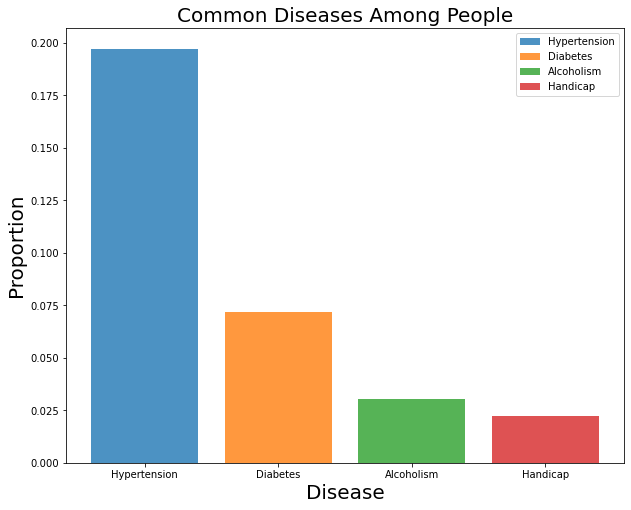

In [50]:
plt.figure(figsize = (10,8))
plt.bar(1,df['hypertension'].mean(), alpha=0.8,label = 'Hypertension')
plt.bar(2,df['diabetes'].mean(), alpha=0.8,label = 'Diabetes')
plt.bar(3,df['alcoholism'].mean(), alpha=0.8,label = 'Alcoholism')
plt.bar(4,df['handicap'].mean(), alpha=0.8,label = 'Handicap')
location = [1,2,3,4]
label = ['Hypertension','Diabetes','Alcoholism','Handicap']
plt.xticks(location,label, fontsize = 10)
plt.xlabel('Disease',fontsize = 20)
plt.ylabel('Proportion', fontsize = 20)
plt.title('Common Diseases Among People',fontsize = 20)
plt.legend();

**From the bar chart above it can be seen that Hypertension is the most common disease among people in Brasil.**

**Research Question 7 (For the most chronic disease, did the patients honoured their appointment?**

-Looking into how people with hypertension showed-up for their appointment

In [51]:
df.groupby('hypertension')['show'].value_counts(normalize = True)*100

hypertension  show
0             Yes     79.096083
              No      20.903917
1             Yes     82.698041
              No      17.301959
Name: show, dtype: float64

**- 83% of people with hypertension showed-up for their appointment whereas 17% of people with hypertension did not 
show-up for their appointment.**

**Research Question 8 (How does sending an SMS influence patient decision to honour an appointment?)**

In [52]:
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [53]:
df.groupby('sms_received')['show'].value_counts(normalize = True)*100

sms_received  show
0             Yes     83.296466
              No      16.703534
1             Yes     72.425455
              No      27.574545
Name: show, dtype: float64

**-A total of 75044 people did not received sms whereas 35482 people received an sms.\
-Out of the people that received an sms, 72% of them honoured there appointment and 28% did not go for their appointment. 
-Out of the people that didn't receive an sms, 83% of them still honoured their appointment whereas only 17% didn't go for the appointment.\
Thus, It can be seen that sending an sms does not guarantee whether a person will go for an appoinment or not.**

**Research Question 9 (What hour of the day do patients mostly visit the hospital?)**

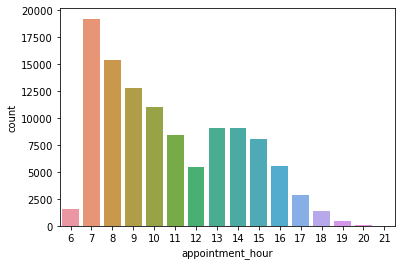

In [54]:
count_v('appointment_hour')

**This chart shows that 7 a.m has the most count for show and no-show appointments. However, there is need to determine if it the same hour with most show i.e with 'Yes'.**

In [55]:
#To check for most show appointment hour
df.groupby('appointment_hour')['show'].value_counts().idxmax()

(7, 'Yes')

**Thus, 7 a.m is the hour with the most show for appointment.**

**Research Question 10 (What day in the week do patients mostly visit the medical facility?**

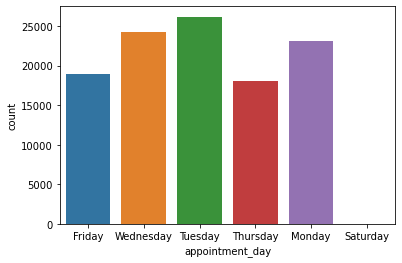

In [56]:
count_v('appointment_day')

**This chart shows that Tuesday has the most count for show and no-show appointments.**

In [57]:
#To check for most show appointment day
df.groupby('appointment_day')['show'].value_counts().idxmax()

('Tuesday', 'Yes')

**Thus, Tuesday is the day with the most show for appointment.**

**Research Question 11 (What month do patients mostly visit the medical facility?)**

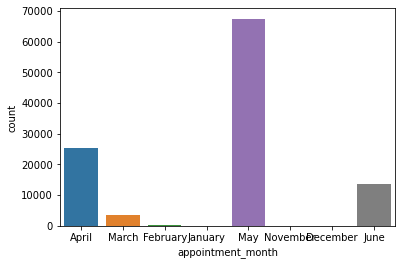

In [58]:
count_v('appointment_month')

In [59]:
df.appointment_month.unique()

array(['April', 'March', 'February', 'January', 'May', 'November',
       'December', 'June'], dtype=object)

In [60]:
df.appointment_month.value_counts()

May         67421
April       25339
June        13749
March        3614
February      281
December       61
January        60
November        1
Name: appointment_month, dtype: int64

In [61]:
#To check for most show appointment month
df.groupby('appointment_month')['show'].value_counts().idxmax()

('May', 'Yes')

**May has the most show for appointment**

In [62]:
#To check for most show appointment hour,day and month
df.groupby(['appointment_hour','appointment_day','appointment_month'])['show'].value_counts().idxmax()

(7, 'Tuesday', 'May', 'Yes')

**Conclusions**

1. Age group of people is within 0 - 115.
2. 80% of Male and Female showed up for their scheduled appointment.
3. 80% of the people showed-up for their appointment and only about 20% missed their appointments.
4. The Parque Industrial had the highest turnout followed immediately by Ilha Do Boi.
5. Ilhas Oceanicas De Trindade had the highest missed appoinments.
6. Most people have not received the Bolsa Familia scholarship
7. Hypertension is the most common disease among people in Brazil. Followed by diabetes,alcoholism, then handicap.
8. Sending an sms does not guarantee whether a person will go for an appoinment or not.
9. 7 a.m, Tuesday and May are respectively the hour, day and month in 2016 with the most show for appointment.
10. Disease type,age group,scholarship are the top parameters that determine if a patient will show up for an appointment.

**Limitations**

1. The dataset  contains information for only 8 months in 2016. Out of this 8 months, 3 months have very little information. Moreso, the missing 4 months from the dataset could contain information that would have been more useful in the data analysing.
2. Only 10% of the people in the dataset received the Bolsa scholarship. This indicates that the data was insufficient to truly make concrete conclusion on the dataset.
3. Moreso, only 35% of people received sms alerts leaving 65% without sms notification for their appoinment.Considering that sms notification should be an important factor, unfortunately, only a small fraction of the people received it.
4. There is no information on the death statistics of the people in the dataset. This would have assisted us to determine if people would rather not honour an appointment because they cannot die from an illness.
5. As the Bolsa Familia scholarship might not be enough, there should have been data about the health insurance of the people in the dataset.